# Voting Classification & Bagging with Moons Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
x, y = make_moons(n_samples=400, noise=0.3, random_state=42)

<Axes: >

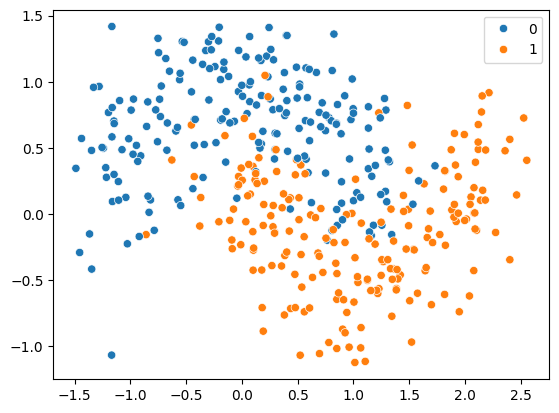

In [3]:
sns.scatterplot(x=x[:,0], 
                y=x[:,1],
                hue=y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=0)

## VotingClassifier

In [5]:
knn_clf = KNeighborsClassifier()
logreg_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()

In [6]:
voting_clf = VotingClassifier(
    estimators=[('lr', logreg_clf), ('knn', knn_clf), ('tr', tree_clf)],
    voting='hard')

In [7]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('tr', DecisionTreeClassifier())])

In [8]:
classifiers = [knn_clf, logreg_clf, tree_clf, voting_clf]

In [9]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.83
LogisticRegression 0.75
DecisionTreeClassifier 0.83
VotingClassifier 0.84


In [10]:
votingsoft_clf = VotingClassifier(
    estimators=[('lr', logreg_clf), ('knn', knn_clf), ('tr', tree_clf)],
    voting='soft')

votingsoft_clf.fit(x_train, y_train)

classifiers = [knn_clf, logreg_clf, tree_clf, voting_clf, votingsoft_clf]

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.83
LogisticRegression 0.75
DecisionTreeClassifier 0.83
VotingClassifier 0.84
VotingClassifier 0.86


In [11]:
import ipywidgets

In [12]:
# plot the decision boundary with the data

def bndplot(clf):
    DecisionBoundaryDisplay.from_estimator(clf, 
                                           x, 
                                           response_method="predict",
                                           cmap="RdBu", 
                                           alpha=0.5
    )

    sns.scatterplot(x=x[:,0], 
                    y=x[:,1],
                    hue=y,
                    palette=['red','green'])

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
ipywidgets.interactive(bndplot,clf=classifiers)

interactive(children=(Dropdown(description='clf', options=(KNeighborsClassifier(), LogisticRegression(), Decis…

# Bagging

In [13]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500,
                            max_samples=100, 
                            bootstrap=True, 
                            n_jobs=-1)

bag_clf.fit(x_train, y_train)

y_pred = bag_clf.predict(x_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.89


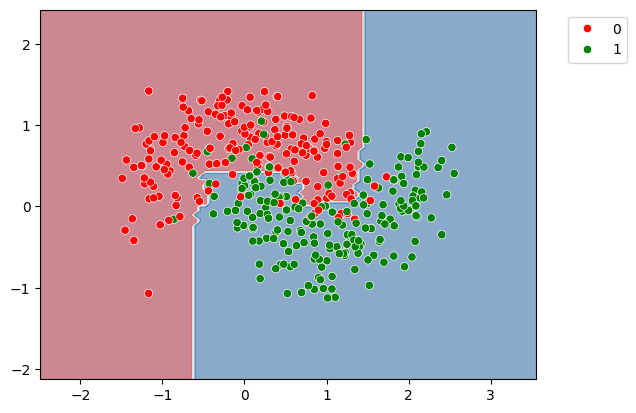

In [14]:
# plot the decision boundary with the data

DecisionBoundaryDisplay.from_estimator(bag_clf, 
                                       x, 
                                       response_method="predict",
                                       cmap="RdBu", 
                                       alpha=0.5
)

sns.scatterplot(x=x[:,0], 
                y=x[:,1],
                hue=y,
                palette=['red','green'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [15]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500,
                            bootstrap=True, 
                            n_jobs=-1, 
                            oob_score=True)

bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.89

In [16]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.87

## Random Forest

In [17]:
rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1,
                                 random_state=42)

rnd_clf.fit(x_train, y_train)

y_pred_rf = rnd_clf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.88

In [18]:
# equivalent bagging classifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes=16),
                            n_estimators=500, 
                            max_samples=1.0, 
                            bootstrap=True, 
                            n_jobs=-1,
                            random_state=42)

In [19]:
bag_clf.fit(x_train, y_train)
y_pred_rf = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.89

In [20]:
classifiers = [knn_clf, logreg_clf, tree_clf, voting_clf, votingsoft_clf, rnd_clf]

In [21]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.83
LogisticRegression 0.75
DecisionTreeClassifier 0.83
VotingClassifier 0.84
VotingClassifier 0.86
RandomForestClassifier 0.88


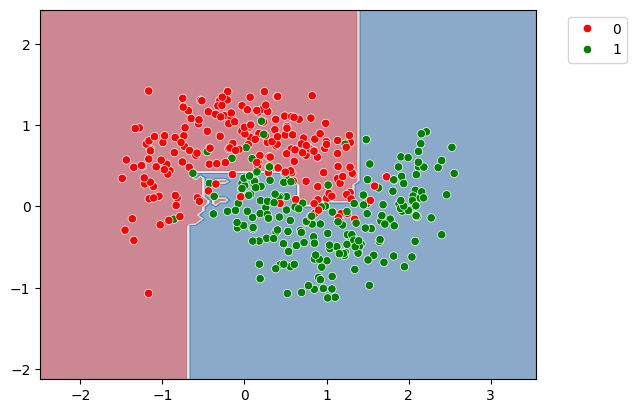

In [22]:
# plot the decision boundary with the data

DecisionBoundaryDisplay.from_estimator(rnd_clf, 
                                       x, 
                                       response_method="predict",
                                       cmap="RdBu", 
                                       alpha=0.5
)

sns.scatterplot(x=x[:,0], 
                y=x[:,1],
                hue=y,
                palette=['red','green'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')